# Boxplots and paired differences

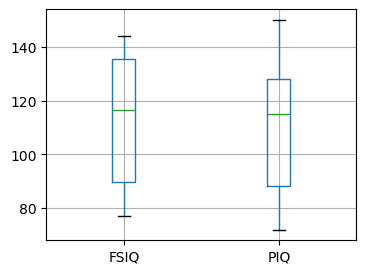

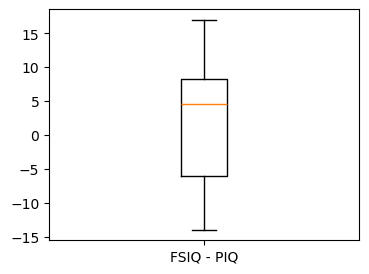

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("brain_size.csv", sep=";", na_values=".")

# Box plot of FSIQ and PIQ (different measures od IQ)
plt.figure(figsize=(4, 3))
data.boxplot(column=["FSIQ", "PIQ"])

# Boxplot of the difference
plt.figure(figsize=(4, 3))
plt.boxplot(data["FSIQ"] - data["PIQ"])
plt.xticks((1,), ("FSIQ - PIQ",))

plt.show()

# Plotting simple quantities of a pandas dataframe

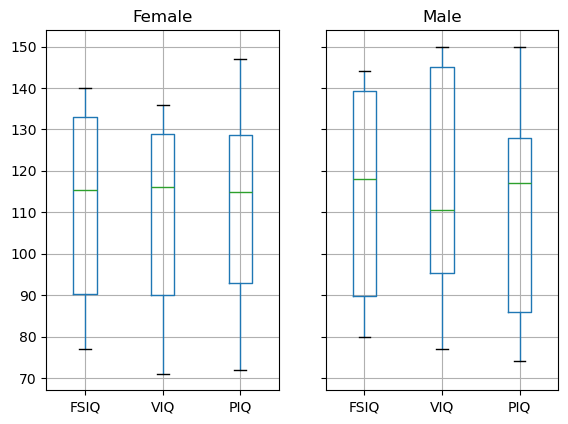

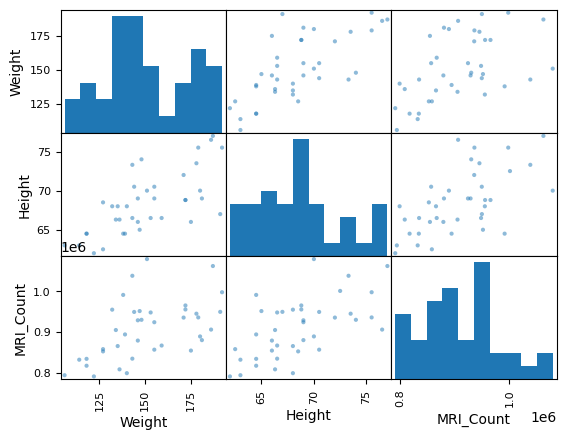

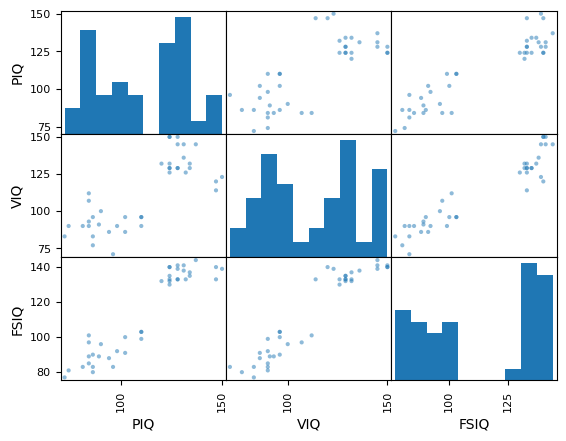

In [ ]:
import pandas as pd
from pandas import plotting
import matplotlib.pyplot as plt

data = pd.read_csv("brain_size.csv", sep=";", na_values=".")

# Box plots of different columns for each gender
groupby_gender = data.groupby("Gender")
groupby_gender.boxplot(column=["FSIQ", "VIQ", "PIQ"])

# Scatter matrices for different columns
plotting.scatter_matrix(data[["Weight", "Height", "MRI_Count"]])
plotting.scatter_matrix(data[["PIQ", "VIQ", "FSIQ"]])

plt.show()

# Analysis of Iris petal and sepal sizes

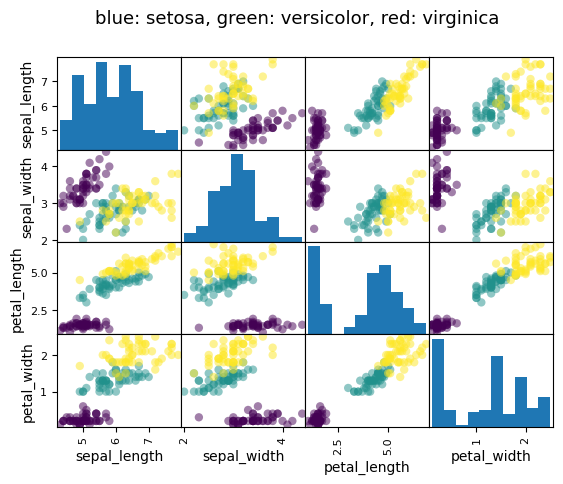

In [ ]:
import pandas as pd
from pandas import plotting
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

# Load the data
data = pd.read_csv("iris.csv")

# Express the names as categories
categories = pd.Categorical(data["name"])

# The parameter 'c' is passed to plt.scatter and will control the color
plotting.scatter_matrix(data, c=categories.codes, marker="o")

fig = plt.gcf()
fig.suptitle("blue: setosa, green: versicolor, red: virginica", size=13);

In [ ]:
# Let us try to explain the sepal length as a function of the petal
# width and the category of iris

model = ols("sepal_width ~ name + petal_length", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           1.58e-20
Time:                        19:18:10   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

In [ ]:
# Now formulate a "contrast", to test if the offset for versicolor and
# virginica are identical

print("Testing the difference between effect of versicolor and virginica")
print(model.f_test([0, 1, -1, 0]))
plt.show()

Testing the difference between effect of versicolor and virginica
<F test: F=3.2453353465741657, p=0.07369058781701222, df_denom=146, df_num=1>


# Simple Regression

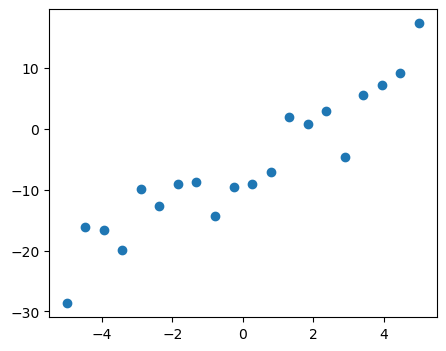

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols

# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

x = np.linspace(-5, 5, 20)

# To get reproducible values, provide a seed value
rng = np.random.default_rng(27446968)

y = -5 + 3 * x + 4 * np.random.normal(size=x.shape)

# Plot the data
plt.figure(figsize=(5, 4))
plt.plot(x, y, "o");

In [ ]:
# Convert the data into a Pandas DataFrame to use the formulas framework
# in statsmodels
data = pd.DataFrame({"x": x, "y": y})

# Fit the model
model = ols("y ~ x", data).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     117.7
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           2.51e-09
Time:                        19:19:14   Log-Likelihood:                -55.949
No. Observations:                  20   AIC:                             115.9
Df Residuals:                      18   BIC:                             117.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0820      0.936     -6.501      0.0

In [ ]:
# Perform analysis of variance on fitted linear model
anova_results = anova_lm(model)

print("\nANOVA results")
print(anova_results)


ANOVA results
            df       sum_sq      mean_sq           F        PR(>F)
x          1.0  2060.153675  2060.153675  117.696461  2.513318e-09
Residual  18.0   315.071209    17.503956         NaN           NaN


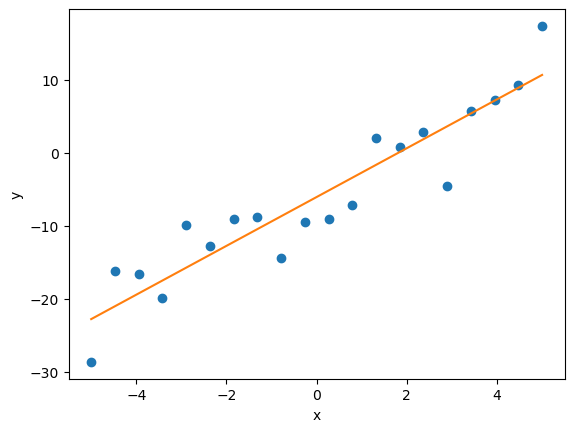

In [ ]:
# Retrieve the parameter estimates
offset, coef = model._results.params
plt.plot(x, y, "o")
plt.plot(x, x * coef + offset)
plt.xlabel("x")
plt.ylabel("y")

plt.show()

# Multiple Regression

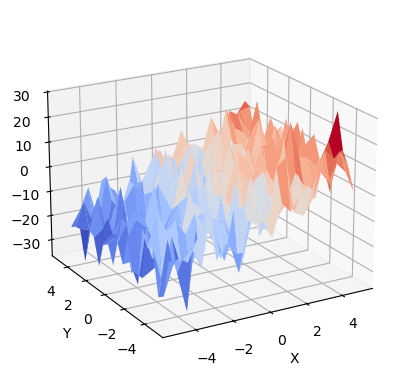

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# For 3d plots. This import is necessary to have 3D plotting below
from mpl_toolkits.mplot3d import Axes3D

# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols

# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

x = np.linspace(-5, 5, 21)
# We generate a 2D grid
X, Y = np.meshgrid(x, x)

# To get reproducible values, provide a seed value
rng = np.random.default_rng(27446968)

# Z is the elevation of this 2D grid
Z = -5 + 3 * X - 0.5 * Y + 8 * np.random.normal(size=X.shape)

# Plot the data
ax: Axes3D = plt.figure().add_subplot(projection="3d")
surf = ax.plot_surface(X, Y, Z, cmap="coolwarm", rstride=1, cstride=1)
ax.view_init(20, -120)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z");

In [ ]:
# Convert the data into a Pandas DataFrame to use the formulas framework
# in statsmodels

# First we need to flatten the data: it's 2D layout is not relevant.
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()

data = pd.DataFrame({"x": X, "y": Y, "z": Z})

# Fit the model
model = ols("z ~ x + y", data).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     293.6
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           1.32e-81
Time:                        19:20:24   Log-Likelihood:                -1519.1
No. Observations:                 441   AIC:                             3044.
Df Residuals:                     438   BIC:                             3057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.8431      0.362    -13.368      0.0

In [ ]:
print("\nRetrieving manually the parameter estimates:")
print(model._results.params)


Retrieving manually the parameter estimates:
[-4.84313006  2.8726885  -0.39316832]


In [ ]:
# Perform analysis of variance on fitted linear model
anova_results = anova_lm(model)

print("\nANOVA results")
print(anova_results)


ANOVA results
             df        sum_sq       mean_sq           F        PR(>F)
x           1.0  33360.081308  33360.081308  576.338876  6.787322e-82
y           1.0    624.895022    624.895022   10.795876  1.099026e-03
Residual  438.0  25352.646192     57.882754         NaN           NaN


# Test for an education/gender interaction in wages

In [ ]:
import pandas as pd
import urllib.request
import os

if not os.path.exists("wages.txt"):
    # Download the file if it is not present
    url = "http://lib.stat.cmu.edu/datasets/CPS_85_Wages"
    with urllib.request.urlopen(url) as r, open("wages.txt", "wb") as f:
        f.write(r.read())

# EDUCATION: Number of years of education
# SEX: 1=Female, 0=Male
# WAGE: Wage (dollars per hour)
data = pd.read_csv(
    "wages.txt",
    skiprows=27,
    skipfooter=6,
    sep=None,
    header=None,
    names=["education", "gender", "wage"],
    usecols=[0, 2, 5],
    engine="python",
)

# Convert genders to strings (this is particularly useful so that the
# statsmodels formulas detects that gender is a categorical variable)
import numpy as np

data["gender"] = np.choose(data.gender, ["male", "female"])

# Log-transform the wages, because they typically are increased with
# multiplicative factors
data["wage"] = np.log10(data["wage"])

<seaborn.axisgrid.FacetGrid>

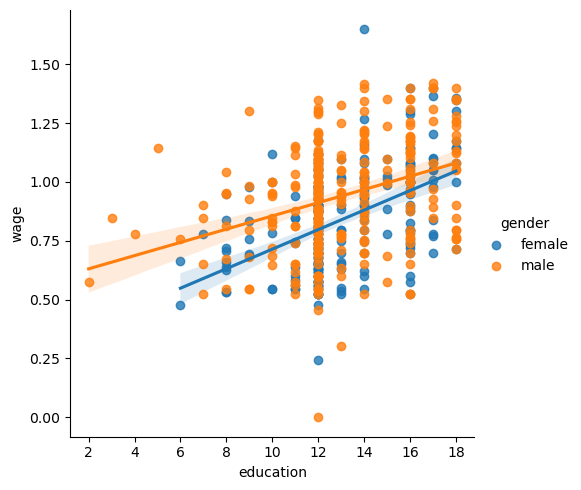

In [ ]:
import seaborn as sns

# Plot 2 linear fits for male and female.
sns.lmplot(y="wage", x="education", hue="gender", data=data)

In [ ]:
import statsmodels.formula.api as sm

# Note that this model is not the plot displayed above: it is one
# joined model for male and female, not separate models for male and
# female. The reason is that a single model enables statistical testing
result = sm.ols(formula="wage ~ education + gender", data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     63.42
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           2.01e-25
Time:                        19:22:43   Log-Likelihood:                 86.654
No. Observations:                 534   AIC:                            -167.3
Df Residuals:                     531   BIC:                            -154.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4053      0.046      8.

In [ ]:
result = sm.ols(
    formula="wage ~ education + gender + education * gender", data=data
).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     43.72
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           2.94e-25
Time:                        19:22:59   Log-Likelihood:                 88.503
No. Observations:                 534   AIC:                            -169.0
Df Residuals:                     530   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

# Visualizing factors influencing wages

In [ ]:
import os
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import requests

if not os.path.exists("wages.txt"):
    # Download the file if it is not present
    r = requests.get("http://lib.stat.cmu.edu/datasets/CPS_85_Wages")
    with open("wages.txt", "wb") as f:
        f.write(r.content)

# Give names to the columns
names = [
    "EDUCATION: Number of years of education",
    "SOUTH: 1=Person lives in South, 0=Person lives elsewhere",
    "SEX: 1=Female, 0=Male",
    "EXPERIENCE: Number of years of work experience",
    "UNION: 1=Union member, 0=Not union member",
    "WAGE: Wage (dollars per hour)",
    "AGE: years",
    "RACE: 1=Other, 2=Hispanic, 3=White",
    "OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other",
    "SECTOR: 0=Other, 1=Manufacturing, 2=Construction",
    "MARR: 0=Unmarried,  1=Married",
]

short_names = [n.split(":")[0] for n in names]

data = pd.read_csv(
    "wages.txt", skiprows=27, skipfooter=6, sep=None, header=None, engine="python"
)
data.columns = pd.Index(short_names)

# Log-transform the wages, because they typically are increased with
# multiplicative factors
import numpy as np

data["WAGE"] = np.log10(data["WAGE"])

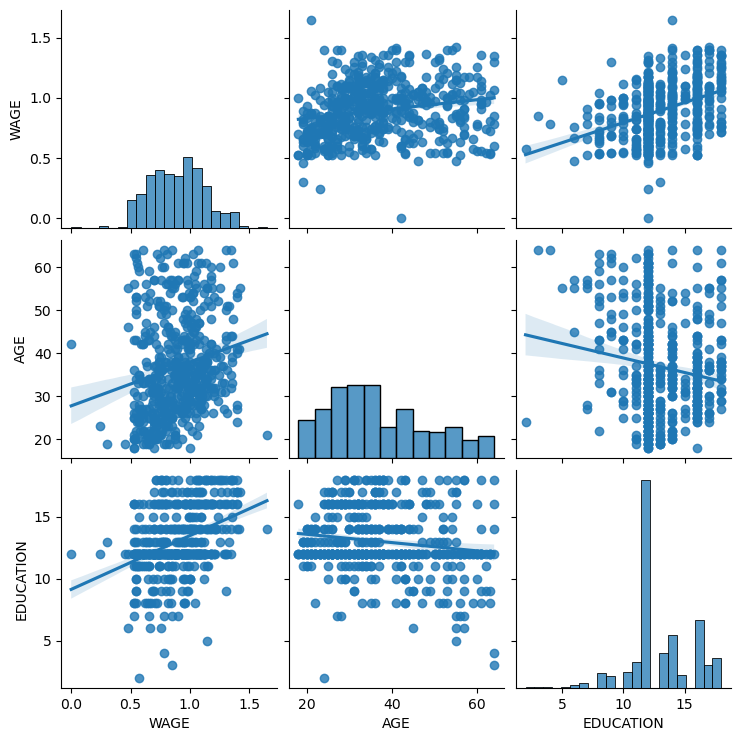

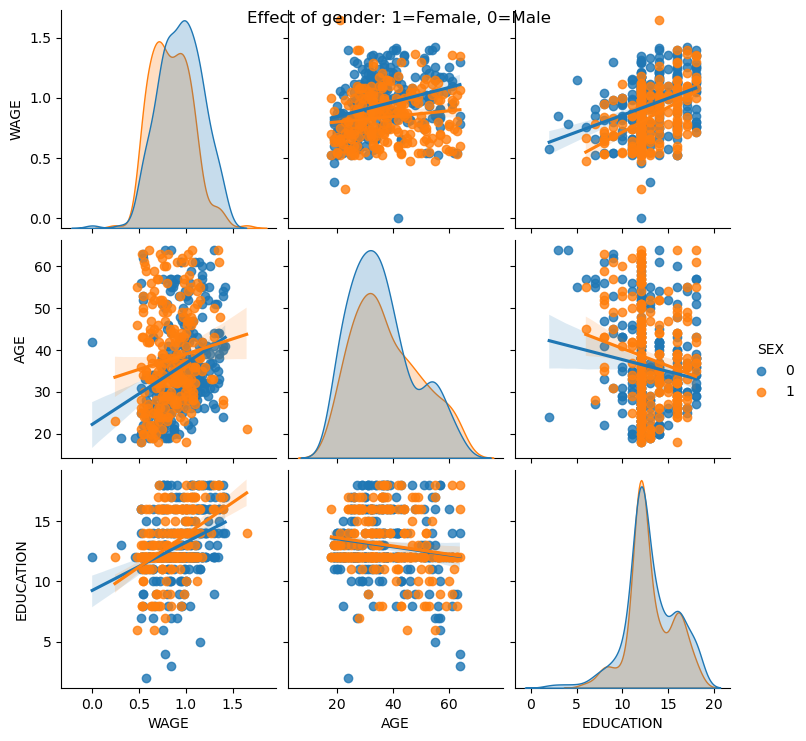

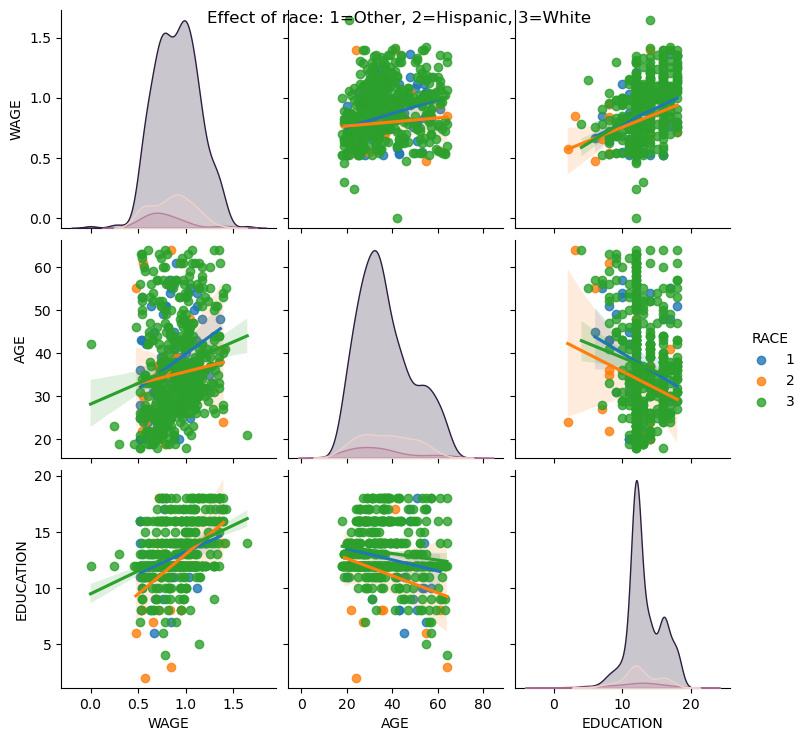

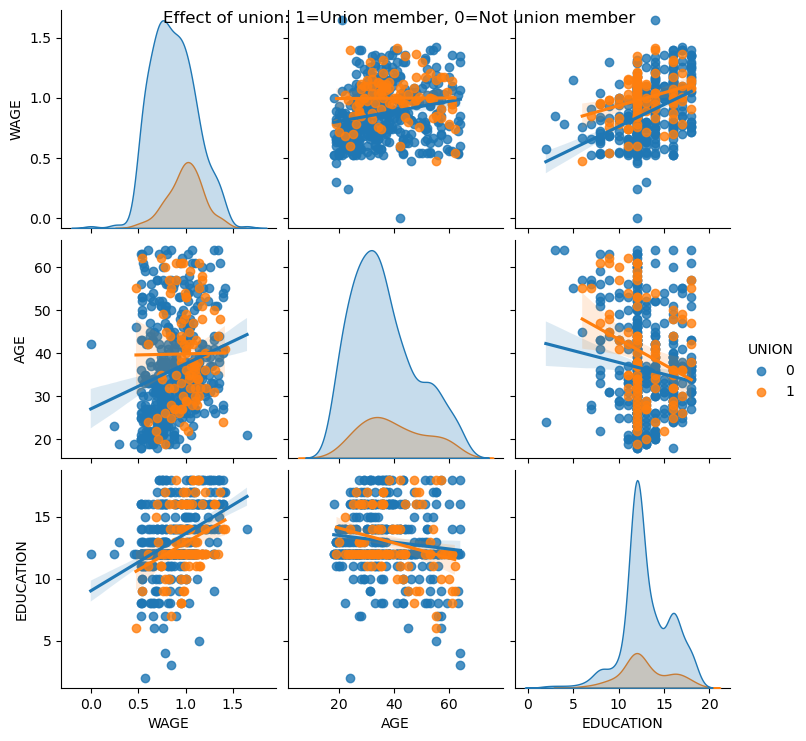

In [ ]:
import seaborn as sns

sns.pairplot(data, vars=["WAGE", "AGE", "EDUCATION"], kind="reg")

sns.pairplot(data, vars=["WAGE", "AGE", "EDUCATION"], kind="reg", hue="SEX")
plt.suptitle("Effect of gender: 1=Female, 0=Male")

sns.pairplot(data, vars=["WAGE", "AGE", "EDUCATION"], kind="reg", hue="RACE")
plt.suptitle("Effect of race: 1=Other, 2=Hispanic, 3=White")

sns.pairplot(data, vars=["WAGE", "AGE", "EDUCATION"], kind="reg", hue="UNION")
plt.suptitle("Effect of union: 1=Union member, 0=Not union member");

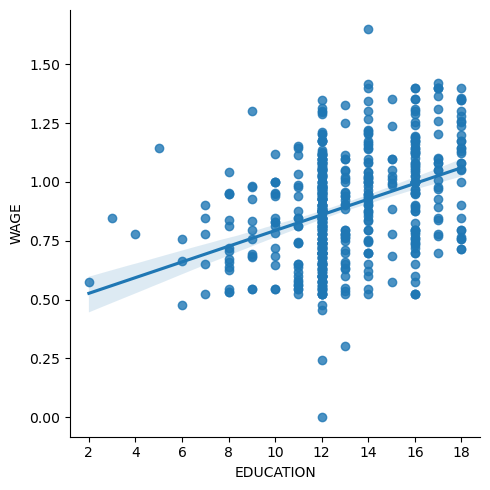

In [ ]:
sns.lmplot(y="WAGE", x="EDUCATION", data=data);

# Air fares before and after 9/11

In [ ]:
# Standard library imports
import os

In [ ]:
import pandas as pd
import requests

if not os.path.exists("airfares.txt"):
    # Download the file if it is not present
    r = requests.get(
        "https://users.stat.ufl.edu/~winner/data/airq4.dat",
        verify=False,  # Wouldn't normally do this, but this site's certificate
        # is not yet distributed
    )
    with open("airfares.txt", "wb") as f:
        f.write(r.content)

# As a separator, ' +' is a regular expression that means 'one of more
# space'
data = pd.read_csv(
    "airfares.txt",
    delim_whitespace=True,
    header=0,
    names=[
        "city1",
        "city2",
        "pop1",
        "pop2",
        "dist",
        "fare_2000",
        "nb_passengers_2000",
        "fare_2001",
        "nb_passengers_2001",
    ],
)

# we log-transform the number of passengers
import numpy as np

data["nb_passengers_2000"] = np.log10(data["nb_passengers_2000"])
data["nb_passengers_2001"] = np.log10(data["nb_passengers_2001"])

In [ ]:
data

,city1,city2,pop1,pop2,dist,fare_2000,nb_passengers_2000,fare_2001,nb_passengers_2001
0,ABE,BNA,613.84,1134.52,685,272.26,1.388279,284.89,1.319314
1,ABE,CLE,613.84,2908.44,339,322.20,1.368473,326.70,1.269046
2,ABE,CLT,613.84,1350.24,480,250.27,1.720986,241.53,1.553398
3,ABE,CMH,613.84,1460.24,395,259.29,1.283979,240.71,1.153205
4,ABE,DEN,613.84,2318.36,1539,202.77,1.908324,209.82,1.741152
...,...,...,...,...,...,...,...,...,...
4171,TYS,SNA,654.18,302.42,1924,311.14,1.332842,276.91,1.317227
4172,TYS,STL,654.18,2557.81,405,254.53,1.726401,229.86,1.678609
4173,TYS,TPA,654.18,2227.00,547,140.12,2.037944,143.55,1.882525
4174,UNV,MCO,132.99,1467.05,873,147.84,1.215109,148.24,1.283979


In [ ]:
# This involves a small danse in which we separate the dataframes in 2,
# one for year 2000, and one for 2001, before concatenating again.

# Make an index of each flight
data_flat = data.reset_index()

data_2000 = data_flat[
    ["city1", "city2", "pop1", "pop2", "dist", "fare_2000", "nb_passengers_2000"]
]
# Rename the columns
data_2000.columns = pd.Index(
    ["city1", "city2", "pop1", "pop2", "dist", "fare", "nb_passengers"]
)
# Add a column with the year
data_2000.insert(0, "year", 2000)

data_2001 = data_flat[
    ["city1", "city2", "pop1", "pop2", "dist", "fare_2001", "nb_passengers_2001"]
]
# Rename the columns
data_2001.columns = pd.Index(
    ["city1", "city2", "pop1", "pop2", "dist", "fare", "nb_passengers"]
)
# Add a column with the year
data_2001.insert(0, "year", 2001)

data_flat = pd.concat([data_2000, data_2001])

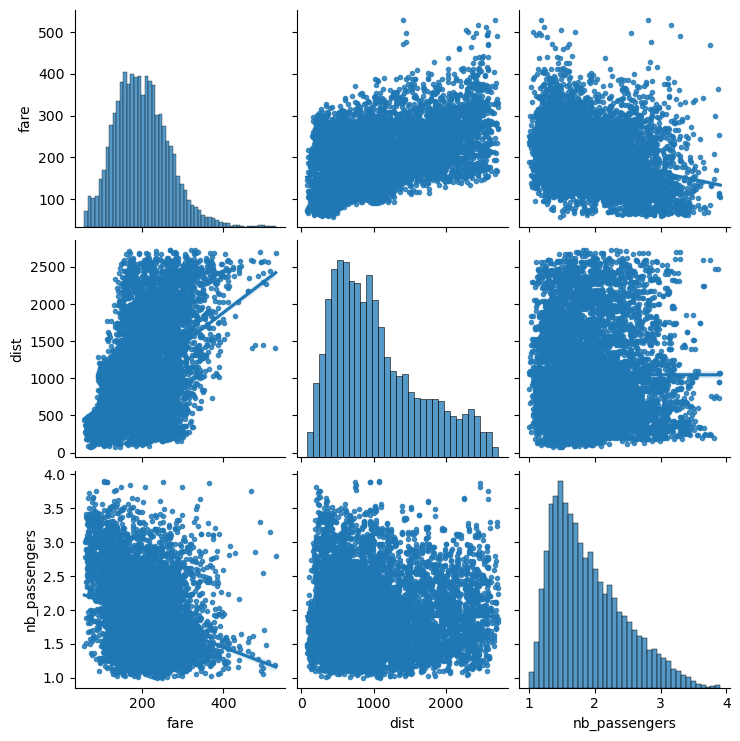

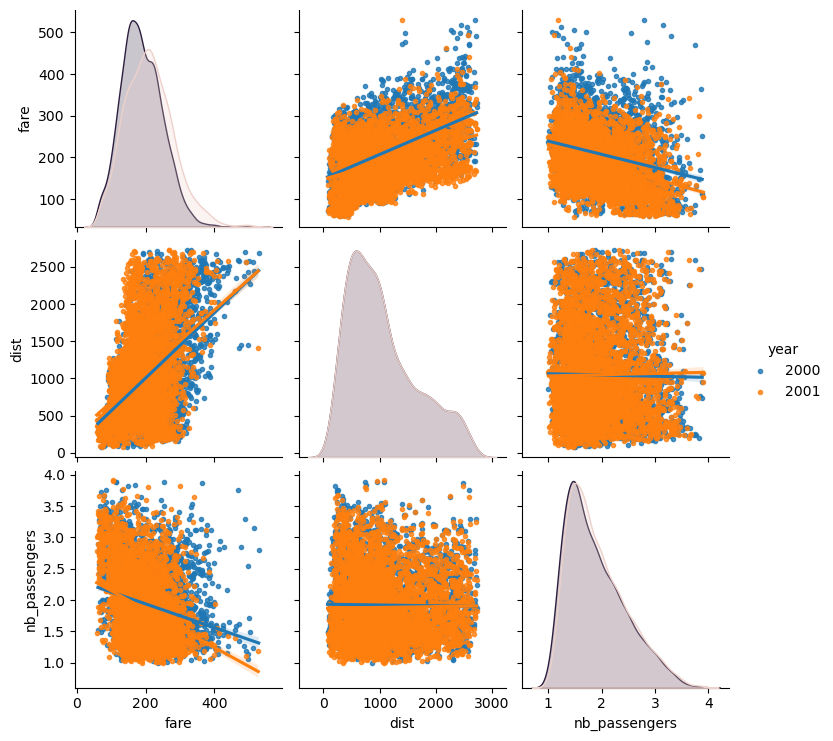

In [ ]:
import seaborn as sns

sns.pairplot(
    data_flat, vars=["fare", "dist", "nb_passengers"], kind="reg", markers="."
)

# A second plot, to show the effect of the year (ie the 9/11 effect)
sns.pairplot(
    data_flat,
    vars=["fare", "dist", "nb_passengers"],
    kind="reg",
    hue="year",
    markers=".",
);

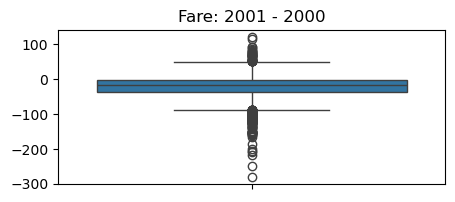

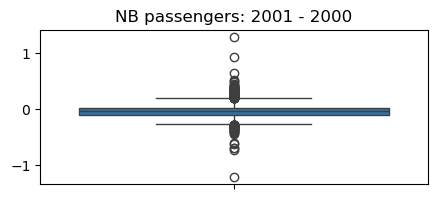

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 2))
sns.boxplot(data.fare_2001 - data.fare_2000)
plt.title("Fare: 2001 - 2000")
plt.subplots_adjust()

plt.figure(figsize=(5, 2))
sns.boxplot(data.nb_passengers_2001 - data.nb_passengers_2000)
plt.title("NB passengers: 2001 - 2000")
plt.subplots_adjust()

plt.show()

In [ ]:
import statsmodels.formula.api as sm

In [ ]:
result = sm.ols(formula="fare ~ 1 + dist + nb_passengers", data=data_flat).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   fare   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1585.
Date:                Tue, 28 Jan 2025   Prob (F-statistic):               0.00
Time:                        19:27:48   Log-Likelihood:                -45532.
No. Observations:                8352   AIC:                         9.107e+04
Df Residuals:                    8349   BIC:                         9.109e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       211.2428      2.466     85.669

In [ ]:
# Using a robust fit
result = sm.rlm(formula="fare ~ 1 + dist + nb_passengers", data=data_flat).fit()
print(result.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                   fare   No. Observations:                 8352
Model:                            RLM   Df Residuals:                     8349
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 28 Jan 2025                                         
Time:                        19:27:57                                         
No. Iterations:                    12                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       215.0848      2.448     87.856

In [ ]:
result = sm.ols(formula="fare_2001 - fare_2000 ~ 1 + dist", data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              fare_2001   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     791.7
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.20e-159
Time:                        19:28:13   Log-Likelihood:                -22640.
No. Observations:                4176   AIC:                         4.528e+04
Df Residuals:                    4174   BIC:                         4.530e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    148.0279      1.673     88.480      0.0

<seaborn.axisgrid.FacetGrid>

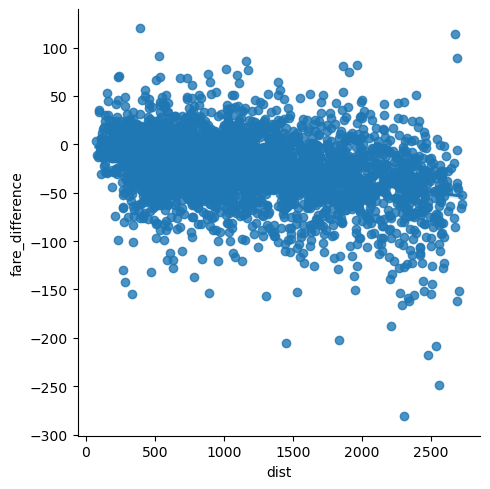

In [ ]:
# Plot the corresponding regression
data["fare_difference"] = data["fare_2001"] - data["fare_2000"]
sns.lmplot(x="dist", y="fare_difference", data=data)

# Relating Gender and IQ

In [ ]:
import pandas
from statsmodels.formula.api import ols

data = pandas.read_csv("brain_size.csv", sep=";", na_values=".")

model = ols("VIQ ~ Gender + MRI_Count + Height", data).fit()
print(model.summary())

# Here, we don't need to define a contrast, as we are testing a single
# coefficient of our model, and not a combination of coefficients.
# However, defining a contrast, which would then be a 'unit contrast',
# will give us the same results
print(model.f_test([0, 1, 0, 0]))

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     3.809
Date:                Tue, 28 Jan 2025   Prob (F-statistic):             0.0184
Time:                        19:28:52   Log-Likelihood:                -172.34
No. Observations:                  39   AIC:                             352.7
Df Residuals:                      35   BIC:                             359.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        166.6258     88.824      1.

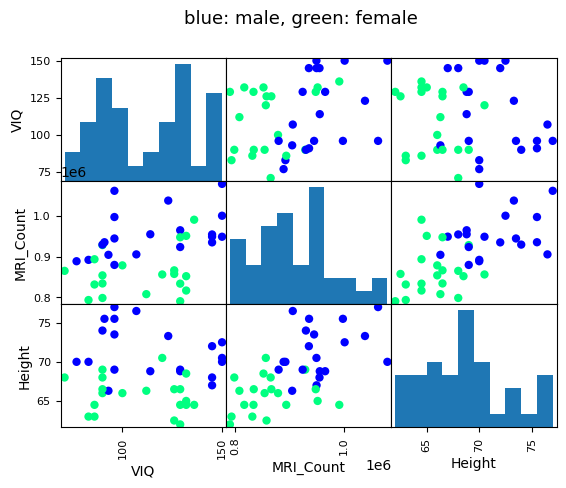

In [ ]:
# This plotting is useful to get an intuitions on the relationships between
# our different variables

from pandas import plotting
import matplotlib.pyplot as plt

# Fill in the missing values for Height for plotting
data["Height"] = data["Height"].ffill()

# The parameter 'c' is passed to plt.scatter and will control the color
# The same holds for parameters 'marker', 'alpha' and 'cmap', that
# control respectively the type of marker used, their transparency and
# the colormap
plotting.scatter_matrix(
    data[["VIQ", "MRI_Count", "Height"]],
    c=(data["Gender"] == "Female"),
    marker="o",
    alpha=1,
    cmap="winter",
)

fig = plt.gcf()
fig.suptitle("blue: male, green: female", size=13)

plt.show()